In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
df = pd.read_csv("weatherdata.csv")
df.isnull().sum()
df

,Outlook,Temperature,Humidity,Wind,Answer
0,sunny,hot,high,weak,no
1,sunny,hot,high,strong,no
2,overcast,hot,high,weak,yes
3,rain,mild,high,weak,yes
4,rain,cool,normal,weak,yes
5,rain,cool,normal,strong,no
6,overcast,cool,normal,strong,yes
7,sunny,mild,high,weak,no
8,sunny,cool,normal,weak,yes
9,rain,mild,normal,weak,yes


In [30]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()

outlook_encoded = label_encoder.fit_transform(df['Outlook'])

temperature_encoded = label_encoder.fit_transform(df['Temperature'])

humidity_encoded = label_encoder.fit_transform(df['Humidity'])

wind_encoded = label_encoder.fit_transform(df['Wind'])

answer_encoded = label_encoder.fit_transform(df['Answer'])

df['Outlook'] = outlook_encoded
df['Temperature'] = temperature_encoded
df['Humidity'] = humidity_encoded
df['Wind'] = wind_encoded
df['Answer'] = answer_encoded

print(df)


    Outlook  Temperature  Humidity  Wind  Answer
0         2            1         0     1       0
1         2            1         0     0       0
2         0            1         0     1       1
3         1            2         0     1       1
4         1            0         1     1       1
5         1            0         1     0       0
6         0            0         1     0       1
7         2            2         0     1       0
8         2            0         1     1       1
9         1            2         1     1       1
10        2            2         1     0       1
11        0            2         0     0       1
12        0            1         1     1       1
13        1            2         0     0       0
14        1            0         1     0       1
15        2            2         1     0       0


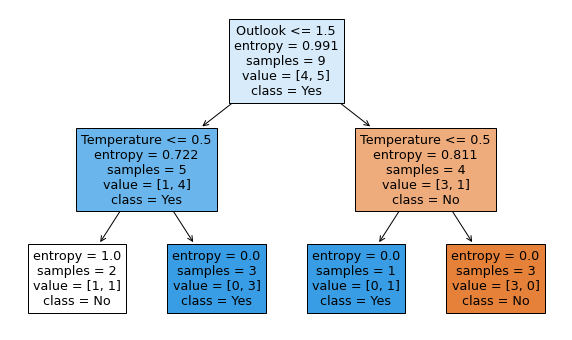

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Define the features and target variable
X = df.drop(columns=['Answer'],)
y = df['Answer']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# Create the decision tree classifier with entropy as the criterion
clf = DecisionTreeClassifier(criterion='entropy')

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Visualize the decision tree
plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()


In [32]:
new_sample = [[2, 0, 0, 1]]  
prediction = clf.predict(new_sample)
print("Prediction on new sample : ",prediction)

Prediction on new sample :  [1]


C:\Users\Mahitha Chimata\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [33]:
df = pd.read_csv("drugdata.csv")
df

,Unnamed: 0,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,0,23,F,HIGH,HIGH,25.355,drugY
1,1,47,M,LOW,HIGH,13.093,drugC
2,2,47,M,LOW,HIGH,10.114,drugC
3,3,28,F,NORMAL,HIGH,7.798,drugX
4,4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...,...
195,195,56,F,LOW,HIGH,11.567,drugC
196,196,16,M,LOW,HIGH,12.006,drugC
197,197,52,M,NORMAL,HIGH,9.894,drugX
198,198,23,M,NORMAL,NORMAL,14.020,drugX


In [34]:
df.isnull().sum()

Unnamed: 0     0
Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [35]:
Sex_encoded = label_encoder.fit_transform(df['Sex'])

BP_encoded = label_encoder.fit_transform(df['BP'])

Cholesterol_encoded = label_encoder.fit_transform(df['Cholesterol'])

Drug_encoded = label_encoder.fit_transform(df['Drug'])

df['Sex'] = Sex_encoded
df['BP'] = BP_encoded
df['Cholesterol'] = Cholesterol_encoded
df['Drug'] = Drug_encoded

df=df.drop(columns=["Unnamed: 0"])
df


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4
...,...,...,...,...,...,...
195,56,0,1,0,11.567,2
196,16,1,1,0,12.006,2
197,52,1,2,0,9.894,3
198,23,1,2,1,14.020,3


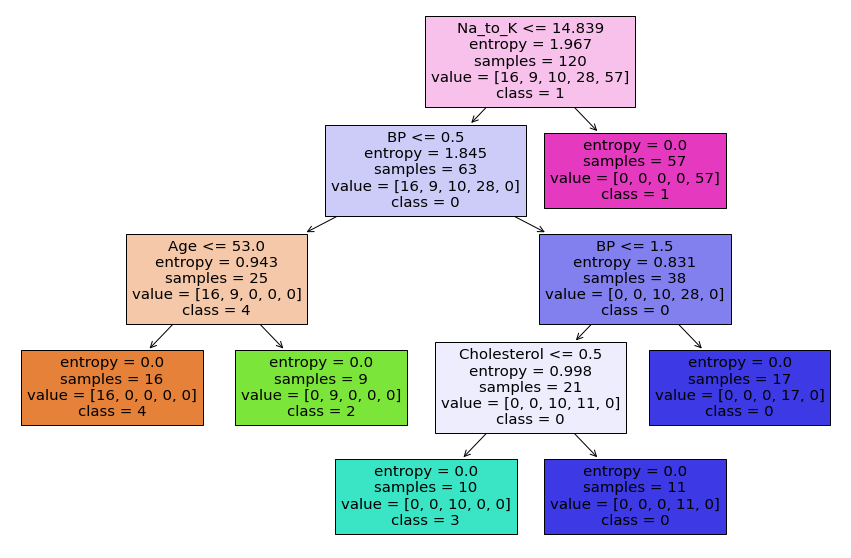

In [37]:
X = df.drop(columns=['Drug'])
y = df['Drug']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

clf = DecisionTreeClassifier(criterion='entropy')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=X.columns, class_names=df['Drug'].unique().astype(str), filled=True)
plt.show()